(83439, 48)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  ob

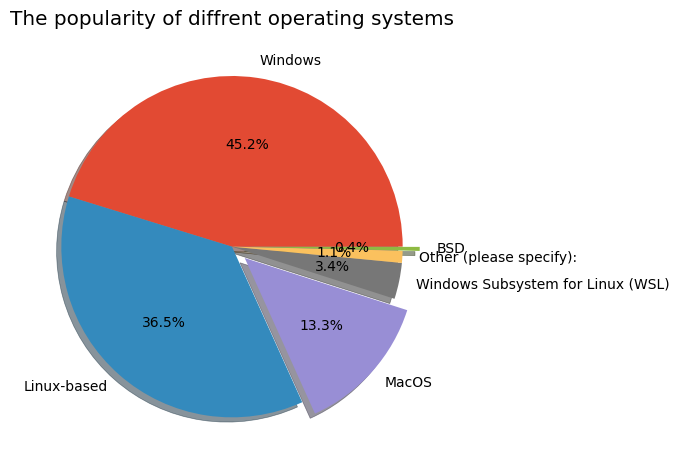

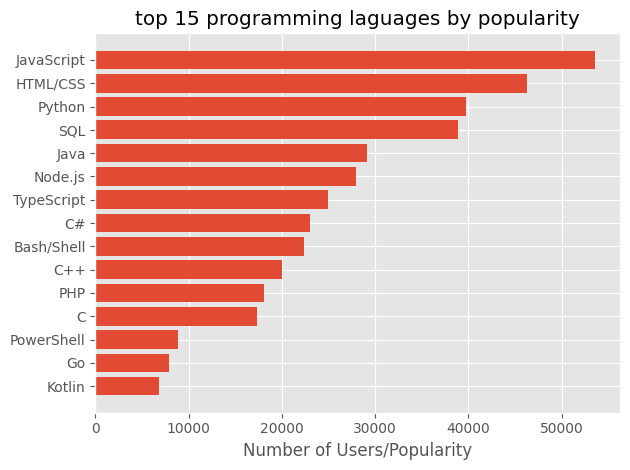

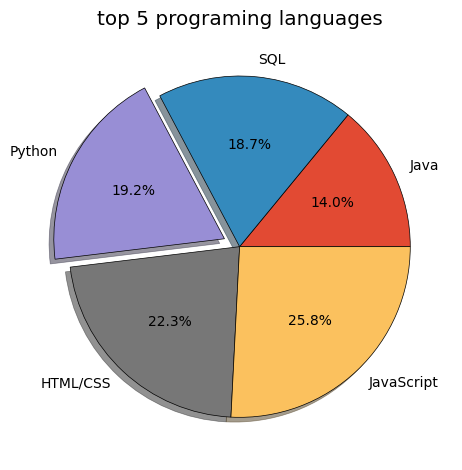

'"\n- The average salary of full-time employed developers with at least 5 years of coding experience,\nworking with Python, and holding a master\'s degree or higher is 72000.0 and the mean is 1.7418568193694478e+25\n\n\n\n\n\n- The distribution of coding experience among these developers is skewed to the right, indicating that a significant portion of them has extensive coding experience.\n- JavaScript is the most popular programming language among these developers, followed by HTML/CSS  (replace with the name of the second most popular language).\n- The salary distribution varies across education levels, with developers holding a doctoral degree having the highest median salary.\n\n-Limitations and Future Directions:\n\n- The analysis is based on survey data, which may be subject to response biases and may not represent the entire developer population accurately.\n- Missing data and outliers could impact the results and interpretations.\n- Future directions for further exploration cou

In [18]:
 #Project Overview: The 2021 stackoverflow data was used
""""This project aims to analyze survey data from developers to gain insights
into various aspects of the developer community. The analysis focuses on employment status,
coding experience, programming languages used, education level, and salary.
The objective is to uncover trends and patterns within the data and provide meaningful interpretations."""
# Loading the data
import pandas as pd

# Loading the survey results data
df = pd.read_csv('survey_results_public.csv')

# Loading the survey schema data
df_schema = pd.read_csv('survey_results_schema.csv', index_col='qname')

# Exploring the data

# Checking the shape and info of the data
print(df.shape)
print(df.info())

# Setting display options for easier data exploration
pd.set_option('display.max_columns', 48)
pd.set_option('display.max_rows', 48)

# Checking the column names
print('columns:',df.columns)

# Filtering for full-time employed employees
employment_full_time = (df['Employment'].str.contains('full-time', na=False))
print(df.loc[employment_full_time]['Employment'])

# Reading the question for the 'Employment' column
print(df_schema.loc['Employment', 'question'])

# Filtering for people with 5 years and above of coding experience
print(df_schema.loc['YearsCode', 'question'])
df['YearsCode'].unique()
df['YearsCode'].replace(['Less than 1 year', 'More than 50 years'], [0, 51], inplace=True)
df['YearsCode'] = df['YearsCode'].astype(float)
five_years_code = (df['YearsCode'] >= 5)
df.loc[five_years_code]

# Filtering for developers who work with Python only
python_users = df['LanguageHaveWorkedWith'].str.contains('Python', na=False)
df.loc[python_users]['LanguageHaveWorkedWith']

# Filtering for developers who have a formal education level of master's degree or higher
df_schema.loc['EdLevel', 'question']
ppl_degree = df['EdLevel'].str.contains('Bachelor’s degree', na=False)
ppl_masters = df['EdLevel'].str.contains('Master’s degree', na=False)
ppl_doctoral = df['EdLevel'].str.contains('Other doctoral degree', na=False)
masters_degree_or_higher = ppl_masters | ppl_doctoral
df.loc[masters_degree_or_higher]['EdLevel']

# Updating the dataframe with the new filters
new_df = df.loc[employment_full_time]
new_df1 = new_df.loc[five_years_code]
new_df2 = new_df1.loc[python_users]
updated_df = new_df2.loc[masters_degree_or_higher]

# Checking if the updated dataframe is correct
updated_df['EdLevel']
updated_df['YearsCode']
updated_df['LanguageHaveWorkedWith']
updated_df['Employment']
updated_df['LanguageHaveWorkedWith'].str.contains('Python').value_counts()

# Calculating the average salary in the updated dataframe
updated_df['CompTotal'].describe()
updated_df['CompTotal'].mean()
updated_df['CompTotal'].median()

# Saving the updated dataframe as a CSV file
updated_df.to_csv('The_question_answer.csv')
updated_df.to_csv('The_question_answer!.txt', sep='\t')

# Additional analysis (testing knowledge)

# Loading the survey results data with 'ResponseId' as the index
#df = pd.read_csv('survey_results_public.csv', index_col='ResponseId')
df.loc[0:3,'MainBranch':'Country']
filt_kenya = df['Country'] == 'Kenya'

# Grouping and working with groups
country_group = df.groupby(['Country'])
df_schema.loc['OpSys', 'question']

# Finding how different countries use different operating systems
country_group[['OpSys']].value_counts().head(48)
df['OpSys'].value_counts()
df['OpSys'].value_counts(normalize=True) * 100
operating_system = country_group['OpSys'].value_counts(normalize=True).loc['Kenya']
operating_system.to_csv('operating_sytems.csv')
#visualizing the data
import matplotlib.pyplot as plt
data = pd.read_csv('operating_sytems.csv')
data.rename(columns={'Other (please specify)':'others'})
os = data['OpSys']
label = os
explode = [0,0,0.1,0,0,0.1]
pct_of_users = data['proportion']
plt.title('The popularity of diffrent operating systems')
plt.pie(pct_of_users,labels = label, shadow = True,explode=explode,
        autopct = '%1.1f%%' )
plt.tight_layout()
plt.show()

# Analyzing salary data for respondents by country
country_group.get_group('Kenya')
country_group['CompTotal'].median()
country_group['CompTotal'].median().loc['Kenya']
country_group['CompTotal'].agg(['median', 'mean']).loc['Kenya']

# Finding the number of people in Kenya who know Python
df.loc[filt_kenya]['LanguageHaveWorkedWith'].str.contains('Python')
kenya_python = df.loc[filt_kenya]['LanguageHaveWorkedWith'].str.contains('Python')
kenya_python.sum()

# Finding the percentage of people in each country who know Python
number_people_know_python = country_group['LanguageHaveWorkedWith'].apply(lambda x: x.str.contains('Python').sum())
country_respondent = df['Country'].value_counts()
python_df = pd.concat([country_respondent, number_people_know_python], axis='columns', sort=False)
python_df = python_df.rename(columns={'count': 'no_rspdt', 'LanguageHaveWorkedWith': 'no_pythn'})
python_df['%_know_pyth'] = (python_df['no_pythn']) / (python_df['no_rspdt']) * 100
python_df.sort_values(by='%_know_pyth', ascending=False, inplace=True)
python_df.head(48)
python_df.loc['Kenya']

# Cleaning the data for languages
data_df = df['LanguageHaveWorkedWith']
data_df.to_csv('data2021')
language_worked_with_df = pd.read_csv('data2021')
language_worked_with_df.rename(columns={'Unnamed: 0': 'responder_id'}, inplace=True)
language_worked_with_df = language_worked_with_df.dropna(subset='LanguageHaveWorkedWith')
language_worked_with_df['LanguageHaveWorkedWith'].str.split(',')
language_worked_with_df.to_csv('data2021_washed1.csv')

df = pd.read_csv('data2021_washed1.csv', index_col='responder_id')
df = df.drop(columns='Unnamed: 0', axis=1)
df.to_csv('data2021_washed.csv')

# Visualizing the data
from matplotlib import pyplot as plt
from collections import Counter

plt.style.use('ggplot')

data = pd.read_csv('data2021_washed.csv')
lang_responses = data['LanguageHaveWorkedWith']
lang_counter = Counter()

for response in lang_responses:
    lang_counter.update(response.split(";"))

num_people = []
programming_lang = []

for item in lang_counter.most_common(15):
    programming_lang.append(item[0])
    num_people.append(item[1])

programming_lang.reverse()
num_people.reverse()

# Plotting the data
plt.barh(programming_lang, num_people)
plt.title('top 15 programming laguages by popularity')
plt.xlabel('Number of Users/Popularity')
plt.tight_layout()
plt.savefig('/Users/mac/Desktop/2021_graph_of_programming.png')
plt.show()
#pie chart of the top 5 programming languages
plt.style.use('ggplot')
labels = ['Java', 'SQL', 'Python', 'HTML/CSS', 'JavaScript']
slices = [ 29162, 38835, 39792, 46259, 53587]
explode = [0,0,0.1,0,0]
plt.title('top 5 programing languages')
plt.pie(slices,labels = labels, shadow = True, explode = explode,
        autopct = '%1.1f%%',wedgeprops ={'edgecolor':'black'} )
plt.tight_layout()
plt.show()
# Data Interpretation:

""""
- The average salary of full-time employed developers with at least 5 years of coding experience,
working with Python, and holding a master's degree or higher is 72000.0 and the mean is 1.7418568193694478e+25





- The distribution of coding experience among these developers is skewed to the right, indicating that a significant portion of them has extensive coding experience.
- JavaScript is the most popular programming language among these developers, followed by HTML/CSS  (replace with the name of the second most popular language).
- The salary distribution varies across education levels, with developers holding a doctoral degree having the highest median salary.

 -Limitations and Future Directions:
 
- The analysis is based on survey data, which may be subject to response biases and may not represent the entire developer population accurately.
- Missing data and outliers could impact the results and interpretations.
- Future directions for further exploration could include analyzing the relationship between programming language proficiency and salary,
  exploring the impact of developer certifications on salary, and investigating the gender pay gap within the developer community.

Conclusion:
 This analysis provides insights into the employment status, coding experience, programming languages used,
 education level, and salary of full-time employed developers with significant coding experience, Python expertise,
 and master's degree or higher education. The findings highlight the average salary, coding experience distribution,
 popular programming languages, and salary distribution by education level. The limitations of the analysis should be acknowledged,
 and future directions for exploration have been suggested.
 
 MORE ANALYSIS WAS ALSO DONE!!!!!!!!!
  AMONG WHICH SCATTER PLOT WAS PLOT  AND MANY MORE
                  
                  ANALYSIS DONE BY JAMES NYAGA
                     EMAIL: nyagajames1420@gmail.com
"""



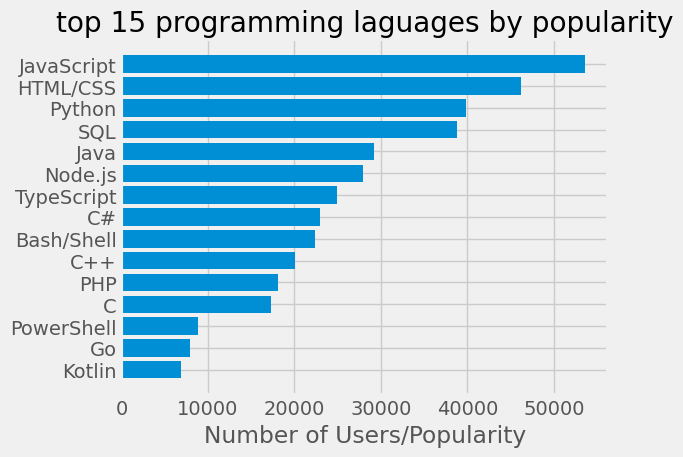

In [22]:
# Visualizing the data
from matplotlib import pyplot as plt
from collections import Counter

plt.style.use('fivethirtyeight')

data = pd.read_csv('data2021_washed.csv')
lang_responses = data['LanguageHaveWorkedWith']
lang_counter = Counter()

for response in lang_responses:
    lang_counter.update(response.split(";"))

num_people = []
programming_lang = []

for item in lang_counter.most_common(15):
    programming_lang.append(item[0])
    num_people.append(item[1])

programming_lang.reverse()
num_people.reverse()

# Plotting the data
plt.barh(programming_lang, num_people)
plt.title('top 15 programming laguages by popularity')
plt.xlabel('Number of Users/Popularity')
plt.tight_layout()
plt.savefig('/Users/mac/Desktop/2021_graph_of_programming.png')
plt.show()

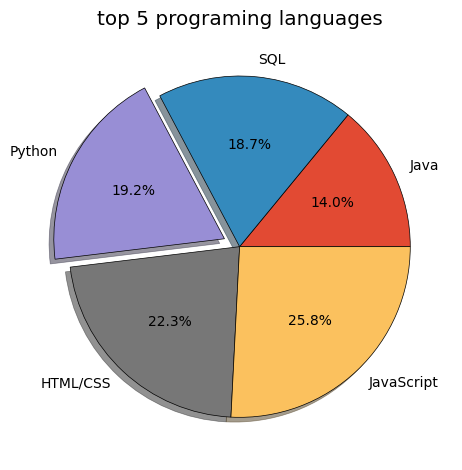

In [20]:
#pie chart of the top 5 programming languages
plt.style.use('ggplot')
labels = ['Java', 'SQL', 'Python', 'HTML/CSS', 'JavaScript']
slices = [ 29162, 38835, 39792, 46259, 53587]
explode = [0,0,0.1,0,0]
plt.title('top 5 programing languages')
plt.pie(slices,labels = labels, shadow = True, explode = explode,
        autopct = '%1.1f%%',wedgeprops ={'edgecolor':'black'} )
plt.tight_layout()
plt.show()

TypeError: __init__() got an unexpected keyword argument 'size'

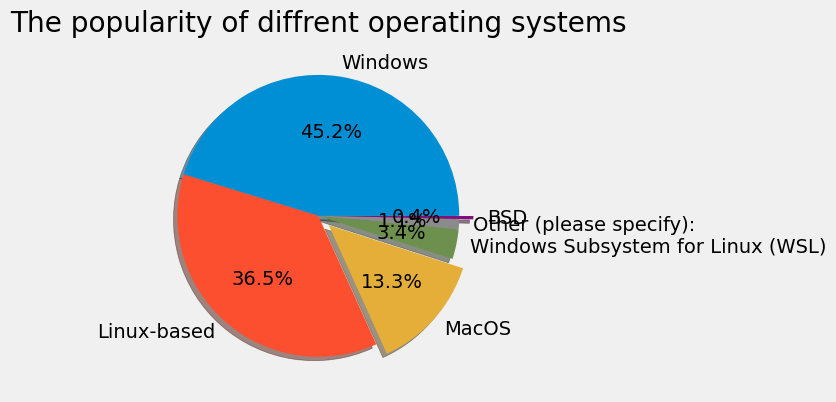

In [27]:
#visualizing the data
import matplotlib.pyplot as plt
data = pd.read_csv('operating_sytems.csv')
data.rename(columns={'Other (please specify)':'others'})
os = data['OpSys']
label = os
explode = [0,0,0.1,0,0,0.1]
pct_of_users = data['proportion']
plt.title('The popularity of diffrent operating systems')
plt.pie(pct_of_users,labels = label, shadow = True,explode=explode,
        autopct = '%1.1f%%' )
plt.tight_layout()
plt.legend(loc= 'lower left', size =8)
plt.show()

